In [ ]:
library(readr)
df <- read_csv("D:/JD crawler/reviews_pre_match.csv",locale = locale(encoding = stringi::stri_enc_get()))
drops <- c("X1")
df <- df[ , !(names(df) %in% drops)]
head(df,1)

In [ ]:
bartlett.test(sentiScore ~ device, data=df)

In [ ]:
library(readr)
df <- read_csv("D:/JD crawler/propensity score matching/pcm_output.csv",locale = locale(encoding = stringi::stri_enc_get()))
drops <- c("X1","distance","weights")
df <- df[ , !(names(df) %in% drops)]
head(df,1)

In [ ]:
library("DataExplorer")
plot_correlation(df[c(6,7,8,9,10,14)], maxcat = 20L, title= 'correlation matrix')

In [ ]:
introduce(df)
plot_intro(df)
plot_missing(df)
plot_bar(df, binary_as_factor = TRUE)
plot_histogram(df)

In [ ]:
bartlett.test(sentiScore ~ device, data=df)

In [ ]:
attach(df)
table(device)
aggregate(sentiScore, by = list(device), FUN = mean)
aggregate(sentiScore, by = list(device), FUN = sd)
fit <- aov(sentiScore ~ device)
summary(fit)

In [ ]:
library(gplots)
plotmeans(sentiScore ~ device, xlab="device", ylab="sentiment score",
main="Mean Plot\nwith 95% CI")

In [ ]:
TukeyHSD(fit)
par(las=2)
par(mar=c(5,8,4,2))
plot(TukeyHSD(fit))

In [ ]:
table(device, productCate)

In [ ]:
aggregate(sentiScore, by=list(device, productCate), FUN=mean)
aggregate(sentiScore, by=list(device, productCate), FUN=sd)

In [ ]:
# Box plot with two factor variables
boxplot(sentiScore ~ productCate * treat, data=df, frame = FALSE, 
        col = c("#00AFBB", "#E7B800"), ylab="Sentiment Score", las=2, cex.names=.5)

In [40]:
fit2 <- aov(sentiScore ~ device*productCate)
summary(fit2)

                      Df Sum Sq Mean Sq F value   Pr(>F)    
device                 1    0.0  0.0234   0.301 0.583119    
productCate           13   21.4  1.6482  21.263  < 2e-16 ***
device:productCate    13    2.8  0.2118   2.733 0.000712 ***
Residuals          11026  854.7  0.0775                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sentiScore ~ device * productCate)

$device
                        diff         lwr         upr     p adj
PC-Mobile Phone -0.002906829 -0.01328836 0.007474702 0.5831194

$productCate
                                                    diff           lwr
Books & CDs-Accessories                    -0.0986071181 -0.1537570850
Clothes-Accessories                         0.0506573764 -0.0200850724
Cosmetics-Accessories                       0.0473430292 -0.0272826962
Daily necessities-Accessories               0.0391438669 -0.0170093271
Digital Product-Accessories                -0.0363791825 -0.0866898632
Food & Drinks-Accessories                   0.0517689491 -0.0013354727
Furniture / Furnishing-Accessories         -0.0319339126 -0.0830829142
Home Appliance-Accessories                  0.0027648481 -0.0508455877
Industrial supplies-Accessories             0.0367761019 -0.0234446627
Maternity &

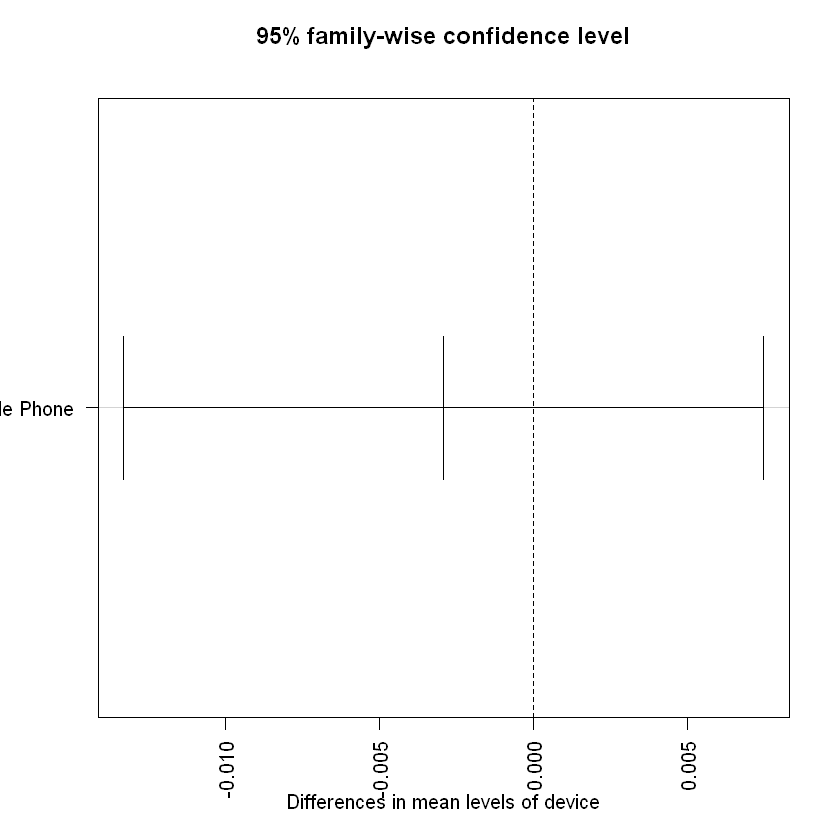

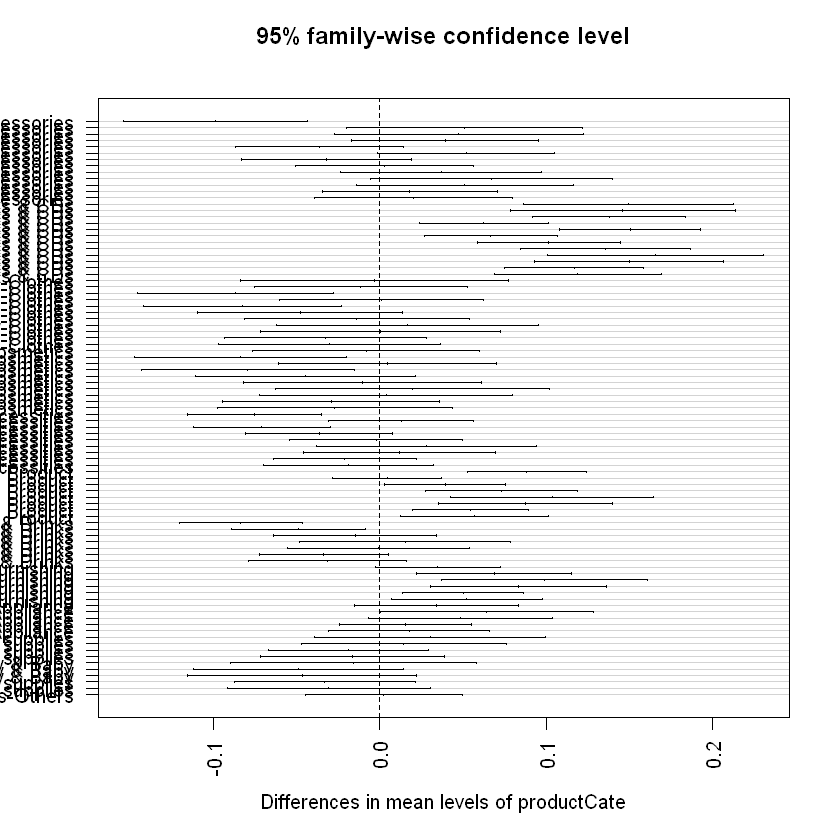

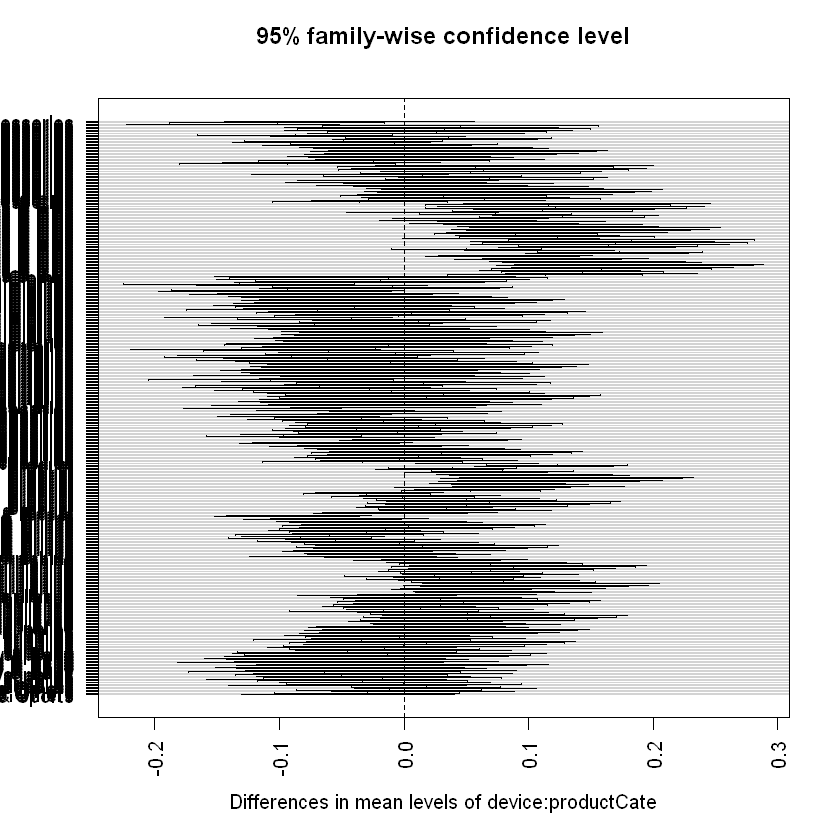

In [41]:
TukeyHSD(fit2)
par(las=2)
plot(TukeyHSD(fit2))

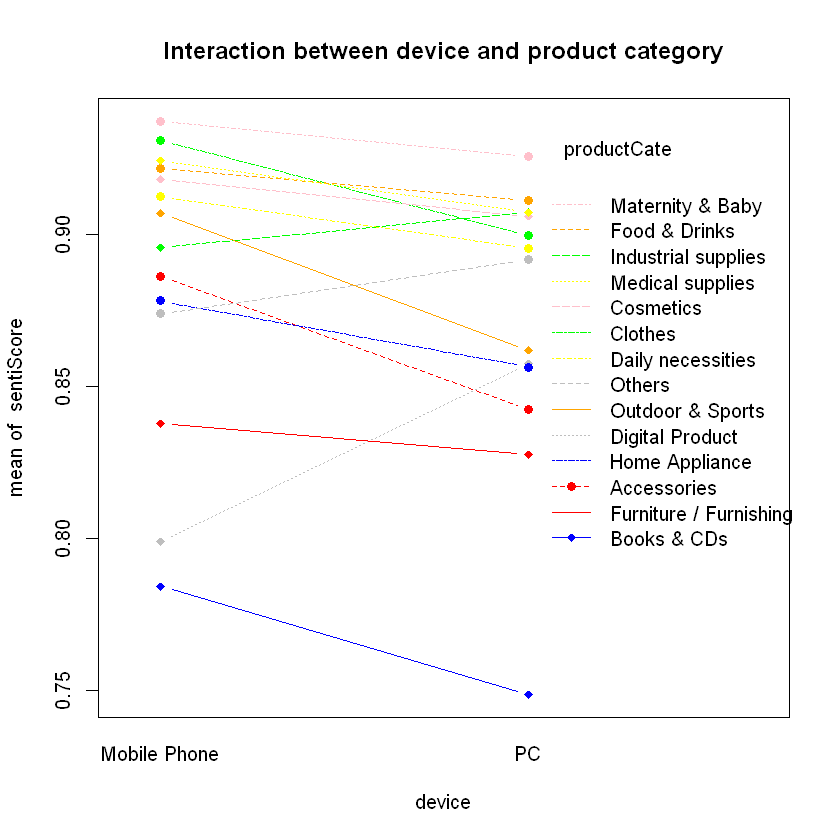

In [42]:
interaction.plot(device, productCate, sentiScore, type="b",
col=c("red","blue","green","pink","yellow","grey","orange"), pch=c(16, 18),
main = "Interaction between device and product category")

# install.packages("HH")
# library(HH)
# interaction2wt(sentiScore~productCate*device)

In [44]:
# library("car")
# fit2.1 <- aov(sentiScore ~ device*productCate, data = df)
# fit2.2 <- Anova(fit2.1, type ='III')
# fit2.2

In [45]:
table(device, membershipLevel)

              membershipLevel
device         1-Normal 2-Bronze 3-Silver 4-Gold 5-Diamond Enterprise Plus
  Mobile Phone      113      213      386    506       869        143 3283
  PC                100      195      381    510       871        133 3320
              membershipLevel
device         Plus(trial)
  Mobile Phone          14
  PC                    17

In [46]:
aggregate(sentiScore, by=list(device, membershipLevel), FUN=mean)
aggregate(sentiScore, by=list(device, membershipLevel), FUN=sd)

Group.1,Group.2,x
<chr>,<chr>,<dbl>
Mobile Phone,1-Normal,0.8690274
PC,1-Normal,0.8416071
Mobile Phone,2-Bronze,0.8346299
PC,2-Bronze,0.8276559
Mobile Phone,3-Silver,0.8190654
PC,3-Silver,0.7828654
Mobile Phone,4-Gold,0.8253506
PC,4-Gold,0.8173575
Mobile Phone,5-Diamond,0.8470297


Group.1,Group.2,x
<chr>,<chr>,<dbl>
Mobile Phone,1-Normal,0.2669689
PC,1-Normal,0.2989457
Mobile Phone,2-Bronze,0.2922093
PC,2-Bronze,0.3117166
Mobile Phone,3-Silver,0.3275908
PC,3-Silver,0.3438054
Mobile Phone,4-Gold,0.3145655
PC,4-Gold,0.3270017
Mobile Phone,5-Diamond,0.2997405


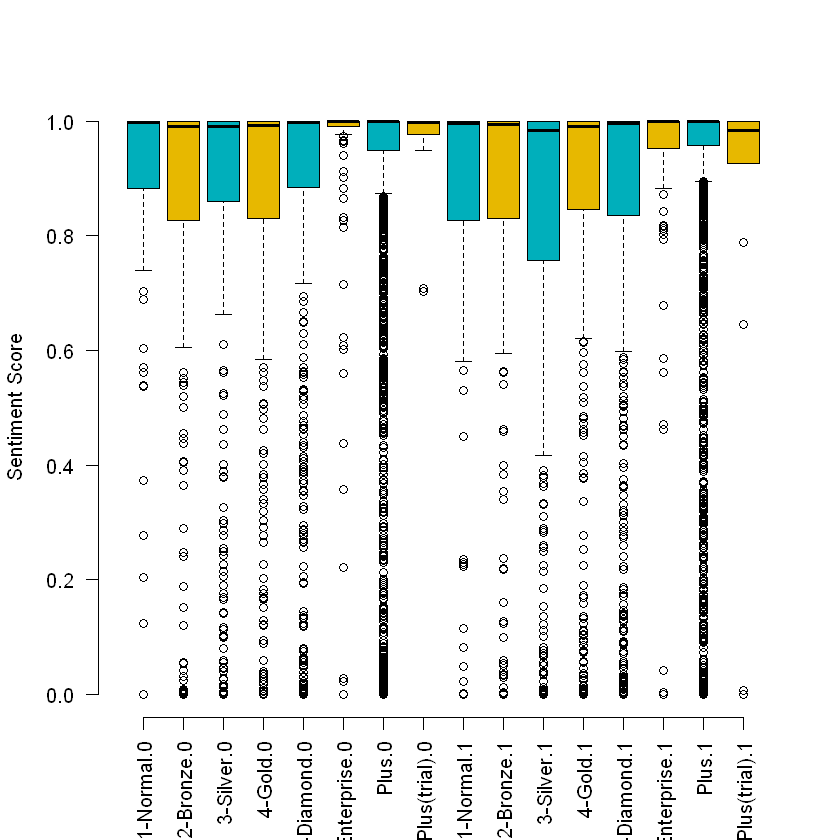

In [47]:
boxplot(sentiScore ~ membershipLevel * treat, data=df, frame = FALSE, 
        col = c("#00AFBB", "#E7B800"), ylab="Sentiment Score", las=2, cex.names=.5)

In [48]:
fit2 <- aov(sentiScore ~ device*membershipLevel)
summary(fit2)

                          Df Sum Sq Mean Sq F value Pr(>F)    
device                     1    0.0  0.0234   0.297  0.586    
membershipLevel            7   10.7  1.5265  19.420 <2e-16 ***
device:membershipLevel     7    0.5  0.0778   0.990  0.437    
Residuals              11038  867.6  0.0786                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sentiScore ~ device * membershipLevel)

$device
                        diff         lwr         upr     p adj
PC-Mobile Phone -0.002906829 -0.01336103 0.007547374 0.5857406

$membershipLevel
                                diff          lwr        upr     p adj
2-Bronze-1-Normal      -0.0248326856 -0.096678774 0.04701340 0.9670069
3-Silver-1-Normal      -0.0549913803 -0.120818183 0.01083542 0.1818143
4-Gold-1-Normal        -0.0347212535 -0.098770864 0.02932836 0.7237756
5-Diamond-1-Normal     -0.0161355423 -0.077832522 0.04556144 0.9935284
Enterprise-1-Normal     0.0663381939 -0.011177082 0.14385347 0.1579045
Plus-1-Normal           0.0306715905 -0.028495682 0.08983886 0.7675496
Plus(trial)-1-Normal    0.0304531842 -0.132927787 0.19383416 0.9992478
3-Silver-2-Bronze      -0.0301586947 -0.082238383 0.02192099 0.6504177
4-Gold-2-Bronze        -0.0098885679 -0.059703010 0.03992587 0.9988663
5-D

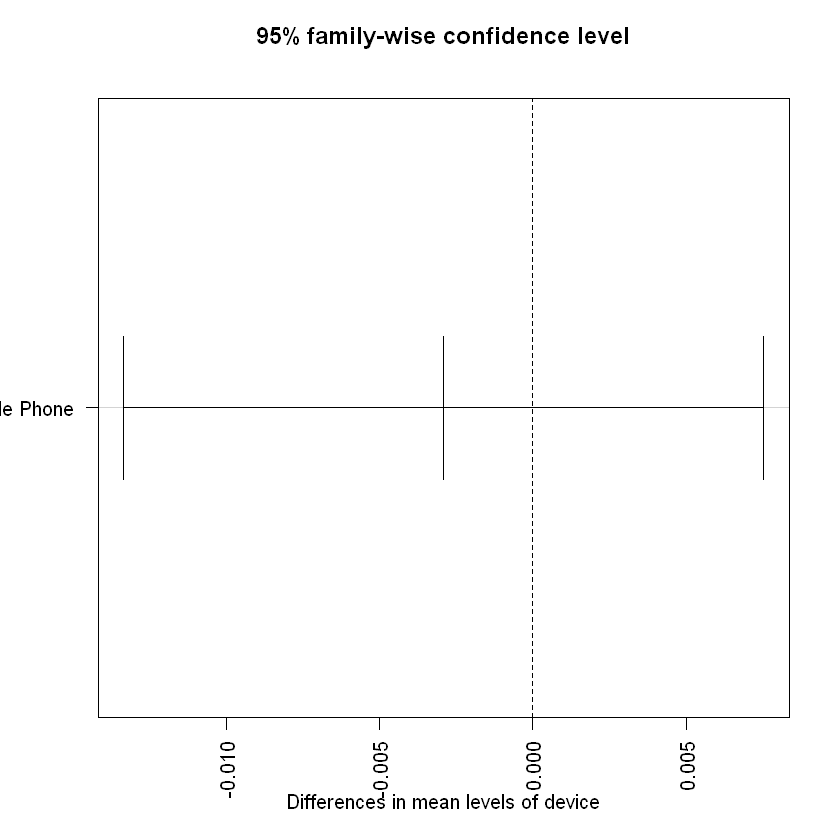

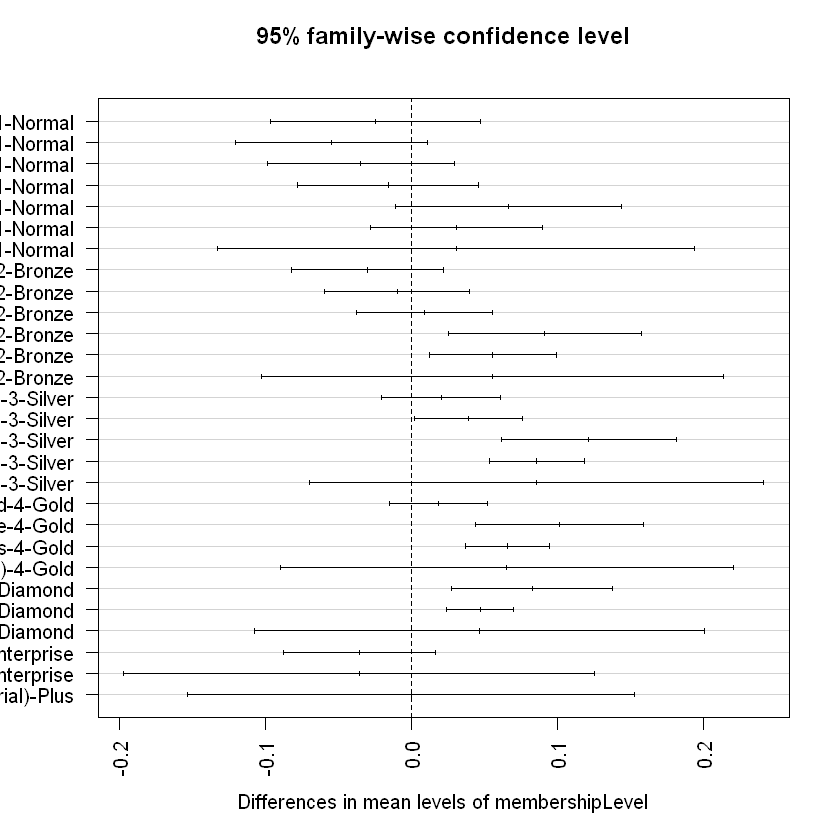

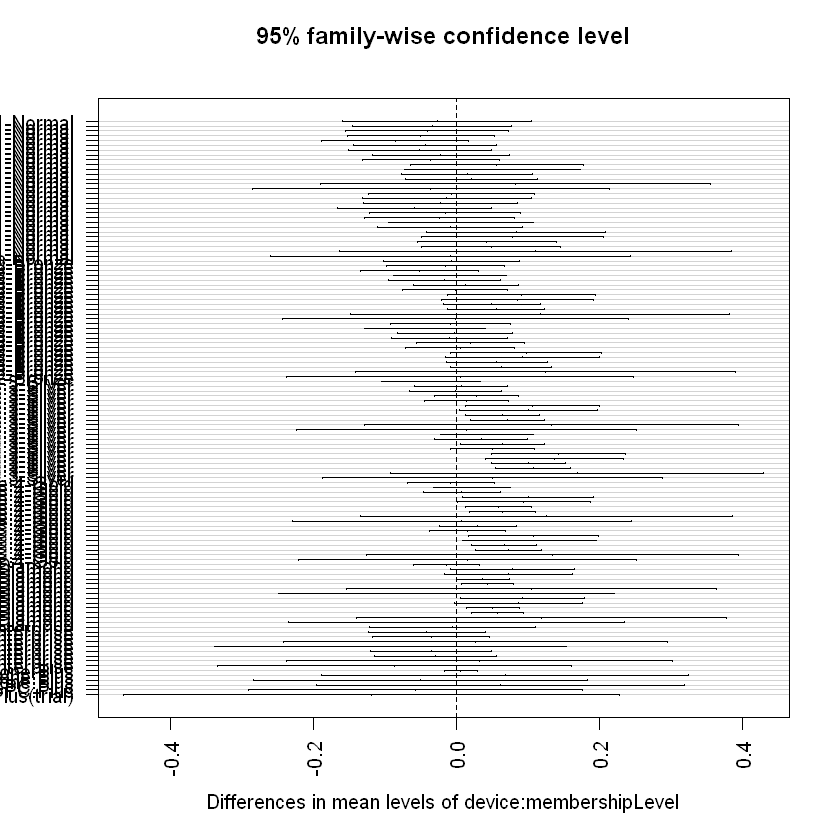

In [49]:
TukeyHSD(fit2)
par(las=2)
plot(TukeyHSD(fit2))

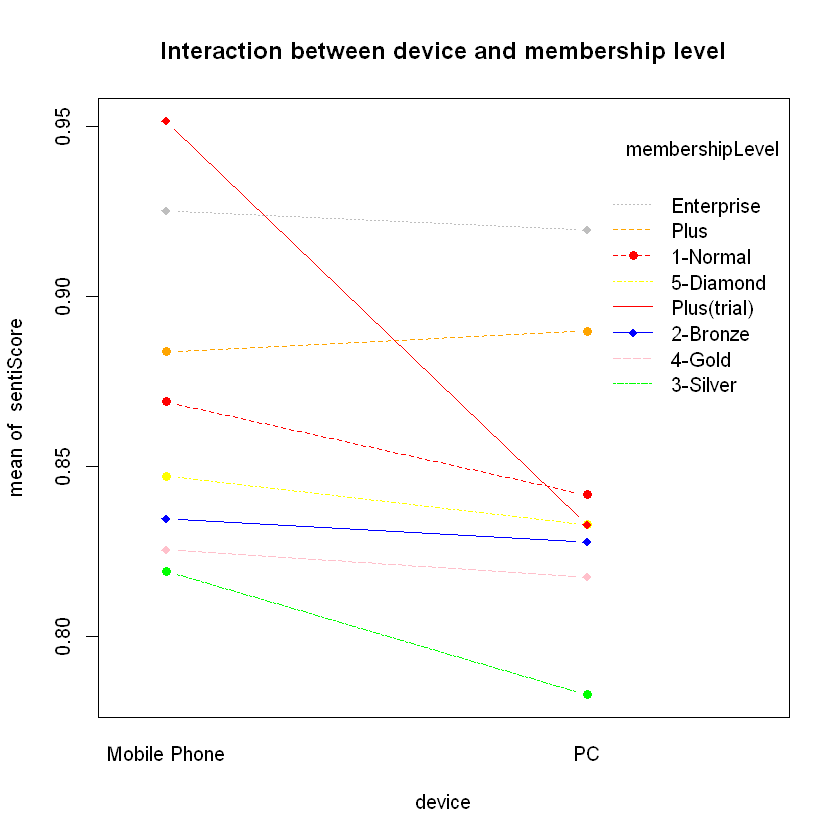

In [51]:
interaction.plot(device, membershipLevel, sentiScore, type="b",
col=c("red","blue","green","pink","yellow","grey","orange"), pch=c(16, 18),
main = "Interaction between device and membership level")

In [ ]:
fit <- lm(sentiScore ~ productCate:device, data=df)
summary(fit)

In [ ]:
fit2 <- lm(sentiScore ~ membershipLevel:device, data=df)
summary(fit2)

In [ ]:
fit4 <- lm(sentiScore ~ source, data=df)
summary(fit4)

In [ ]:
fit5 <- lm(sentiScore ~ productCate:source, data=df)
summary(fit5)

In [ ]:
fit6 <- lm(sentiScore ~ membershipLevel:source, data=df)
summary(fit6)